In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools as pt
from rdkit import DataStructs
from rdkit import rdBase
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import pubchempy as pcp
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
all_drugs = pd.read_pickle('morgan_and_mac.pkl')

In [4]:
drugs = all_drugs[:2000]
drugs.head()

,CID,Molecule,drug_class,Morgan2FP,MACCSKeys,AtomPairFP,TopTorFP,MorganCircFP,drug_class_code
0,24769,<rdkit.Chem.rdchem.Mol object at 0x00000243DCF...,hematologic,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7
1,134694070,<rdkit.Chem.rdchem.Mol object at 0x00000243E86...,cardio,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3
2,5121,<rdkit.Chem.rdchem.Mol object at 0x00000243DCF...,antiinfective,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
3,4660557,<rdkit.Chem.rdchem.Mol object at 0x00000243DCF...,cns,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
4,122175,<rdkit.Chem.rdchem.Mol object at 0x00000243DCF...,antineoplastic,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2


In [5]:
print(type(drugs['MorganCircFP'].iloc[0]))

<class 'numpy.ndarray'>


Red convolucional

In [6]:
# example of a cnn for image classification
from numpy import set_printoptions
from numpy import asarray
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [7]:
drugs['MorganCircFP'].iloc[0].shape

(2048,)

In [8]:
def concat_narrays(a1, a2):
    arr = np.concatenate((a1, a2), axis=0)
    return arr

In [9]:
drugs['FP_chain'] = drugs.apply(lambda x: concat_narrays(x['Morgan2FP'],x['MorganCircFP']), axis=1)
display(drugs.head())
X = drugs['FP_chain']
y = drugs['drug_class_code']
drugs['FP_chain'][0].shape

C:\Users\josin\AppData\Local\Temp\ipykernel_10220\2875725365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs['FP_chain'] = drugs.apply(lambda x: concat_narrays(x['Morgan2FP'],x['MorganCircFP']), axis=1)


,CID,Molecule,drug_class,Morgan2FP,MACCSKeys,AtomPairFP,TopTorFP,MorganCircFP,drug_class_code,FP_chain
0,24769,<rdkit.Chem.rdchem.Mol object at 0x00000243DCF...,hematologic,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,134694070,<rdkit.Chem.rdchem.Mol object at 0x00000243E86...,cardio,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,5121,<rdkit.Chem.rdchem.Mol object at 0x00000243DCF...,antiinfective,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4660557,<rdkit.Chem.rdchem.Mol object at 0x00000243DCF...,cns,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,122175,<rdkit.Chem.rdchem.Mol object at 0x00000243DCF...,antineoplastic,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


(4096,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
x_train = np.array(list(X_train))
print(type(x_train))
print(x_train.shape)
x_test = np.array(list(X_test))
n_classes = len(unique(y_train))
print(len(unique(y_train)))
x_train=x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test=x_test.reshape((x_test.shape[0], x_test.shape[1], 1))
in_shape = x_train.shape[1:]
print(in_shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

<class 'numpy.ndarray'>
(1400, 4096)
12
(4096, 1)
(1400, 4096, 1) (1400,)
(600, 4096, 1) (600,)


In [12]:
model = Sequential()
model.add(Conv1D(100, 9, activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool1D(4))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# fit the model
model.fit(x_train, y_train, epochs=5, batch_size=128, verbose=1)
# evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {acc:.3f}')
# make a prediction
#   image = x_train[0]
y_pred = model.predict(x_test)
set_printoptions(precision=3)
print(f'Predicted: class={argmax(y_pred[1])}')

Epoch 1/5
11/11 [==============================] - 15s 1s/step - loss: 5.8822 - accuracy: 0.2943
Epoch 2/5
11/11 [==============================] - 13s 1s/step - loss: 1.9455 - accuracy: 0.2943
Epoch 3/5
11/11 [==============================] - 15s 1s/step - loss: 1.7250 - accuracy: 0.3893
Epoch 4/5
11/11 [==============================] - 12s 1s/step - loss: 1.5497 - accuracy: 0.4293
Epoch 5/5
11/11 [==============================] - 13s 1s/step - loss: 1.4145 - accuracy: 0.4836
Accuracy: 0.617
19/19 [==============================] - 2s 96ms/step
Predicted: class=9


In [14]:
y_pred_mor = [argmax(x) for x in y_pred]

print(x_test[29].shape)
print(list(y_test))
print(y_pred_mor)

(4096, 1)
[4, 9, 0, 2, 0, 0, 2, 6, 9, 0, 9, 0, 2, 0, 4, 0, 4, 0, 0, 5, 2, 3, 0, 0, 0, 7, 2, 0, 0, 9, 1, 0, 0, 0, 10, 0, 1, 0, 10, 4, 3, 6, 2, 0, 0, 3, 2, 0, 9, 1, 3, 2, 2, 0, 0, 4, 2, 0, 2, 0, 0, 2, 3, 8, 6, 2, 3, 0, 0, 5, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 9, 8, 0, 4, 0, 0, 3, 0, 2, 1, 0, 0, 0, 5, 0, 0, 4, 6, 0, 3, 4, 0, 2, 3, 4, 2, 1, 4, 1, 0, 2, 2, 0, 4, 1, 0, 0, 9, 0, 0, 0, 0, 8, 7, 4, 0, 0, 4, 2, 0, 1, 4, 4, 5, 3, 5, 3, 9, 0, 2, 0, 5, 8, 10, 2, 0, 3, 1, 1, 0, 0, 2, 1, 0, 3, 0, 0, 6, 0, 10, 2, 4, 2, 3, 3, 7, 0, 0, 10, 4, 4, 2, 0, 0, 4, 0, 0, 0, 1, 8, 0, 4, 3, 2, 3, 7, 3, 3, 3, 3, 1, 0, 6, 4, 9, 0, 8, 8, 9, 2, 4, 0, 2, 1, 4, 2, 0, 0, 4, 4, 4, 9, 0, 0, 7, 2, 5, 3, 4, 2, 0, 2, 4, 5, 2, 0, 2, 7, 8, 4, 3, 0, 4, 5, 2, 6, 4, 0, 0, 4, 0, 3, 0, 0, 0, 0, 4, 3, 10, 0, 3, 5, 8, 0, 2, 10, 0, 1, 2, 1, 2, 9, 9, 0, 3, 2, 3, 2, 4, 2, 1, 0, 7, 0, 0, 1, 1, 2, 0, 3, 3, 7, 1, 4, 0, 9, 3, 0, 2, 2, 0, 0, 7, 3, 2, 3, 9, 2, 0, 4, 3, 2, 0, 2, 0, 0, 2, 0, 8, 7, 2, 3, 1, 4, 8, 4, 4, 2, 0, 4, 9, 0, 4, 5, 4, 0, 5, 1

In [15]:
print( metrics.classification_report(y_test,y_pred_mor))

              precision    recall  f1-score   support

           0       0.63      0.83      0.71       193
           1       0.75      0.72      0.73        46
           2       0.59      0.58      0.59        89
           3       0.50      0.64      0.56        67
           4       0.59      0.43      0.50        90
           5       1.00      0.11      0.20        18
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        20
           8       0.67      0.70      0.68        23
           9       0.80      0.86      0.83        28
          10       1.00      0.08      0.14        13

    accuracy                           0.62       600
   macro avg       0.59      0.45      0.45       600
weighted avg       0.61      0.62      0.58       600



c:\Users\josin\anaconda3\envs\kedro-environment\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\josin\anaconda3\envs\kedro-environment\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\josin\anaconda3\envs\kedro-environment\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

19/19 [==============================] - 3s 133ms/step
Predicted: class=9


In [19]:
x_test.shape

(600, 4096, 1)

In [54]:
cid_paracetamol = 16004692

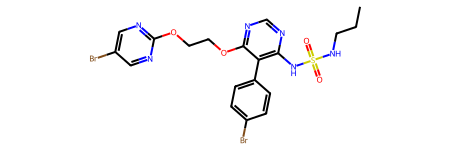

In [55]:
#get mol
comp_paracetamol = pcp.Compound.from_cid(cid_paracetamol)
smiles_paracetamol = comp_paracetamol.canonical_smiles
mol_paracetamol = Chem.MolFromSmiles(smiles_paracetamol)
display(mol_paracetamol)

In [56]:
def compute_morgan_fp(mol, depth=2, nBits=2048):
    try:
        mor_fp = AllChem.GetMorganFingerprintAsBitVect(mol,depth,nBits)
    except:
        print('Something went wrong computing Morgan fingerprints')
        return None
    return np.array(mor_fp)

In [57]:
def compute_morgan_circular_fp(mol, depth=2, nBits=2048):
    try:
        mc_fp = AllChem.GetMorganFingerprintAsBitVect(mol, depth, nBits)
    except:
        print('Something went wrong computin Morgan circular fingerprints')
        return None
    return np.array(mc_fp)

In [58]:
mc_fp_paracetamol = compute_morgan_circular_fp(mol_paracetamol)
m_fp_paracetamol = compute_morgan_fp(mol_paracetamol)

In [59]:
paracetamol_chain = np.concatenate((m_fp_paracetamol, mc_fp_paracetamol), axis=0)

In [60]:

paracetamol_array = np.array(paracetamol_chain)
reshaped = np.array(paracetamol_array.reshape(1, paracetamol_array.shape[0], 1))
display(reshaped.shape)
y_pred = model.predict(reshaped)
print(f'Predicted: class={argmax(y_pred)}')

(1, 4096, 1)

1/1 [==============================] - 0s 67ms/step
Predicted: class=0
